In [127]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [128]:
import numpy as np
import pandas as pd
import datetime as dt 

In [129]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [130]:
 # Create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [131]:
# Reflect Database into a new model 
Base = automap_base()

# Reflect the tables 
Base.prepare(engine, reflect=True)

# View all the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [132]:
# Save references to each table 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [133]:
 # Create our session (link) from Python to the DB
session = Session(engine)

In [134]:
# Exploratory Precipitation Analysis

In [135]:
# Find the most recent date in the data set. 
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [136]:
# Measurement
columns = inspector.get_columns('measurement')
for i in columns:
    print(i['name'], i['type'])

# Station
columns_2 = inspector.get_columns('station')
for i in columns:
    print(i['name'], i['type'])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [137]:
# Find the most recent data in the data set
recent_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(f"The most recent data is: {recent_data}")



The most recent data is: ('2017-08-23',)


In [138]:
# Calculate the date one year from the last data in the data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

print("Query Data: ", query_date)


Query Data:  2016-08-23


In [139]:
#Query to retrieve the last 12 months of precipitation data and plot the results.
Precipitation = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date > '2016-08-23').all()


In [140]:
# Save the query results as a Pandas DataFrame 
precipitation_df = pd.DataFrame(Precipitation, columns = ['Precipitation', 'Dates'])

# Set the index to the date column                             
precipitation_df= precipitation_df.set_index("Dates")

# Sort the dataframe by data
precipitation_df = precipitation_df.sort_values(by=['Dates'])

# Display
precipitation_df.head()


,Precipitation
Dates,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


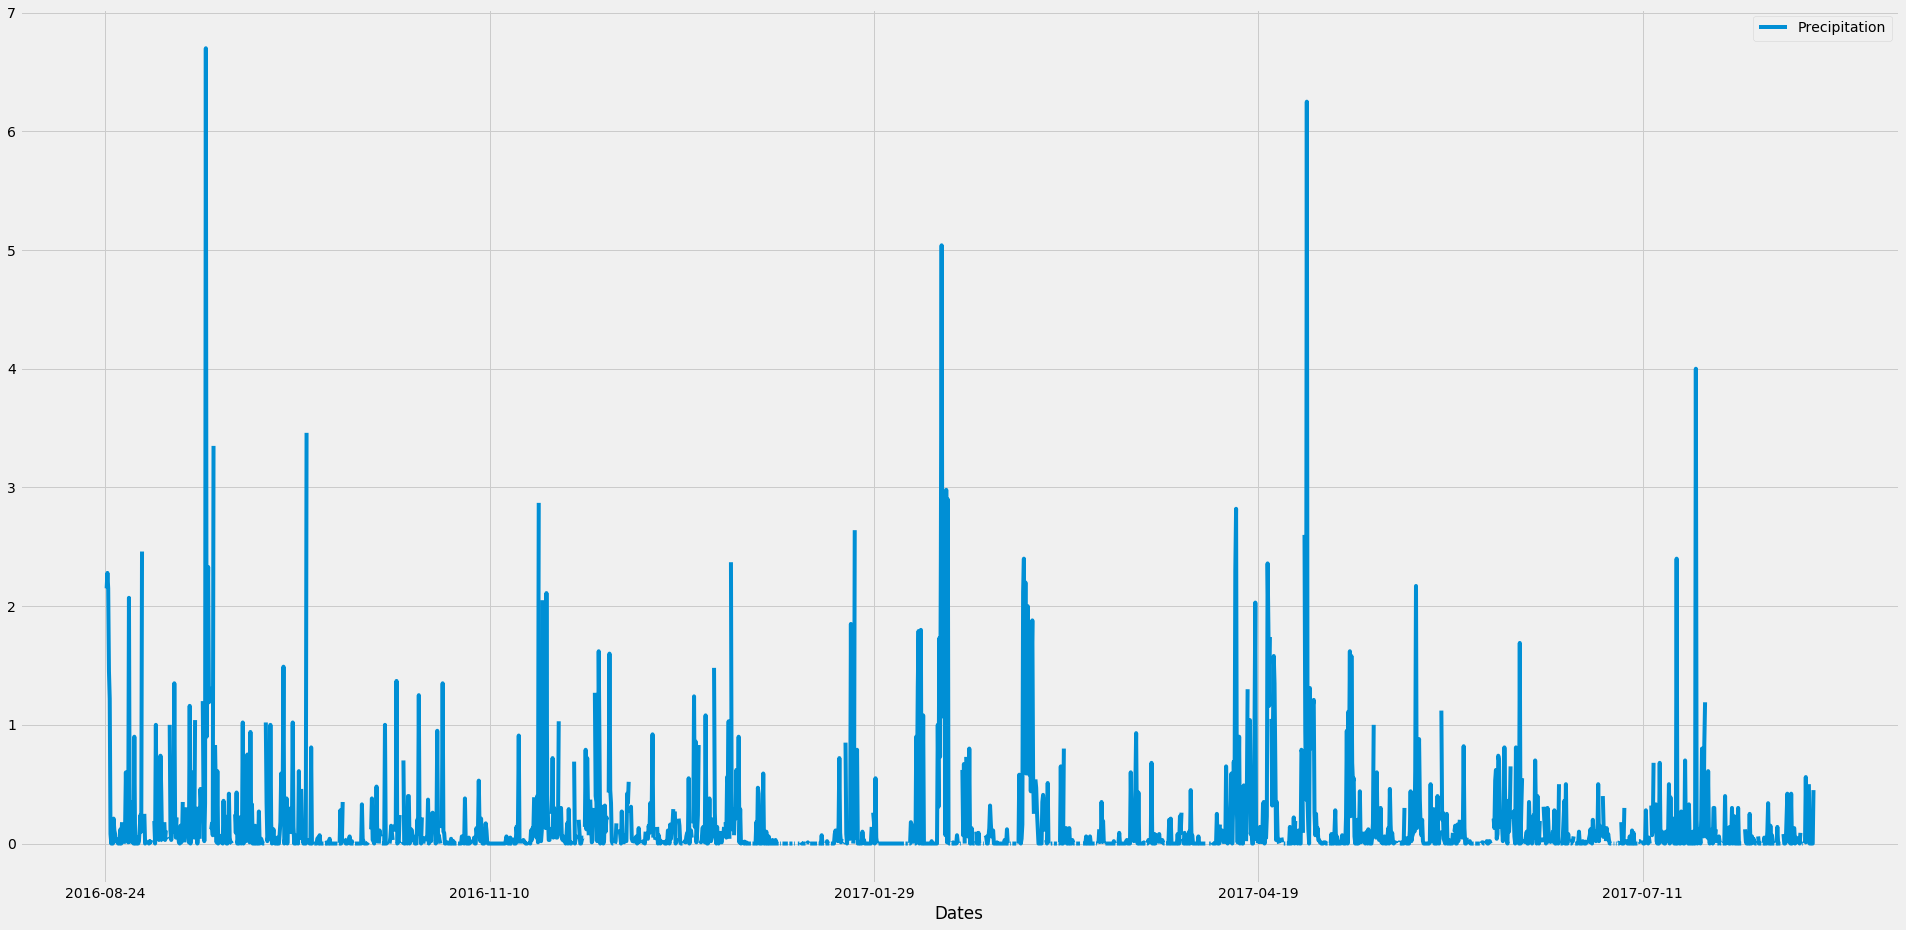

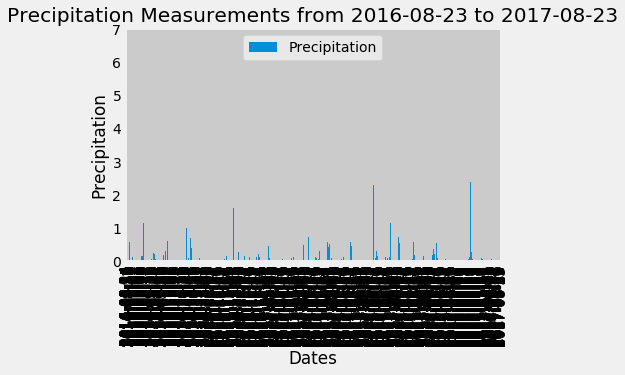

In [141]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize=(30,15))
precipitation_df.plot.bar()
plt.title("Precipitation Measurements from 2016-08-23 to 2017-08-23")
plt.xlabel("Dates")
plt.ylabel("Precipitation")
plt.show()

In [142]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [143]:
# Exploratory Station Analysis

In [152]:
 # Design a query to calculate the total number stations in the dataset
session.query(func.count(Measurement.station)).all() 


[(19550,)]

In [153]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
session.query(Measurement.station, func.count(Measurement.station).\
              order_by(func.count(Measurement.station).desc()).all()

# List the stations and the counts in descending order.



SyntaxError: unexpected EOF while parsing (<ipython-input-153-31f3f73f73ec>, line 6)